In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy



In [10]:
bank_df = pd.read_csv("C:\\Users\\akshv\\Desktop\\projects\\bank loan approval(ANN)\\UniversalBank.csv") 
bank_df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
bank_df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


                                             EDA 





In [12]:
bank_df.info()  #1 Getting infomation about the dataset - rows, columns, dtype etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [15]:
bank_df.describe().T  #2 Getting the statistical information about the data.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [16]:
bank_df.isnull().sum()  #seeing how many null values exist

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [23]:
# avg in dataset

print(bank_df['Age'].mean())

# % of customers who have credit cards 

print((bank_df['CreditCard'].sum()/bank_df['CreditCard'].count())*100)

# % of customers who accepted teh personal loan

print((bank_df['Personal Loan'].sum()/bank_df['Personal Loan'].count())*100)



45.3384
29.4
9.6


                                DATA VISULAIZATION

C:\Users\akshv\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

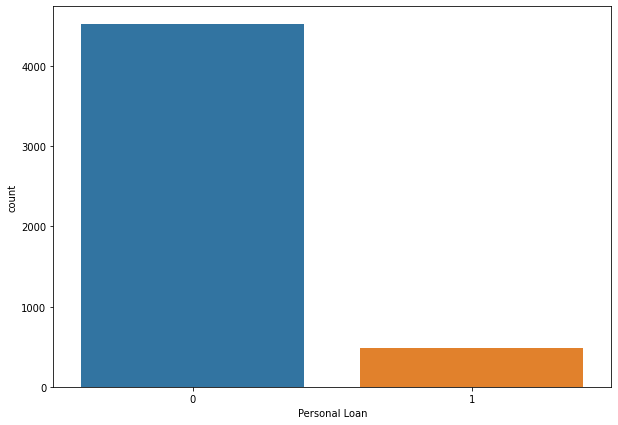

In [24]:
# countplot

plt.figure(figsize = (10,7))
sns.countplot(bank_df['Personal Loan'])

C:\Users\akshv\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

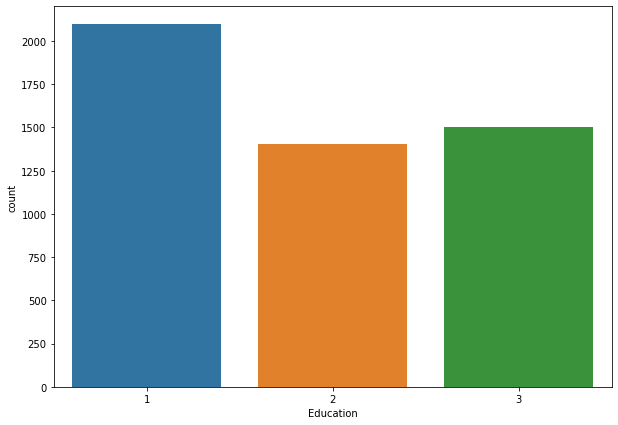

In [25]:
plt.figure(figsize = (10, 7))
sns.countplot(bank_df['Education'])

C:\Users\akshv\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

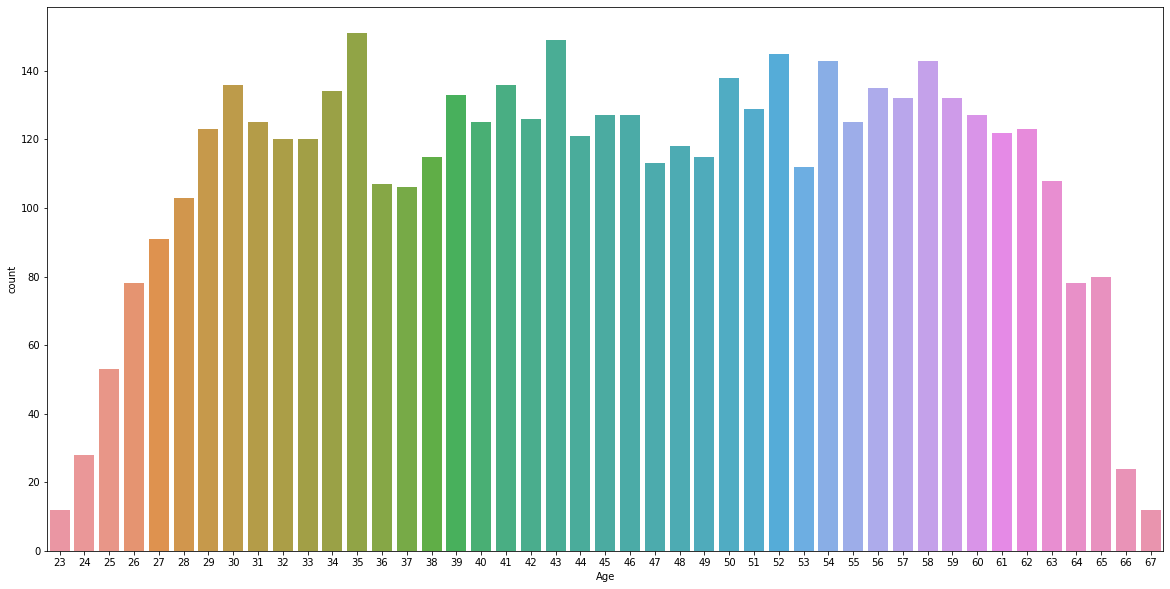

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(bank_df['Age'])

C:\Users\akshv\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

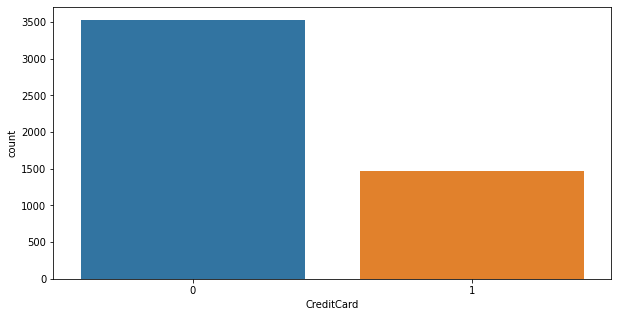

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(bank_df['CreditCard'])

C:\Users\akshv\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

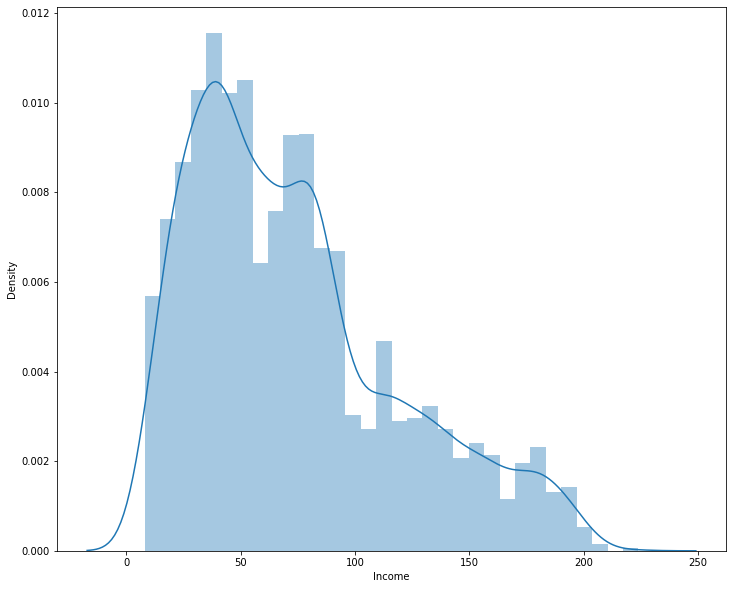

In [31]:
plt.figure(figsize = (12,10))
sns.distplot(bank_df['Income'])

In [32]:
# CREATING TWO DATAFRAME FOR THE TWO CLASSES

personalloans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [33]:
# GETTING OVERVIEW OF PERSONALLOAN DATAFRAME
personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [34]:
# GETTING OVERVIEW OF NO_PERSONALLOAN DATAFRAME
no_personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


C:\Users\akshv\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akshv\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

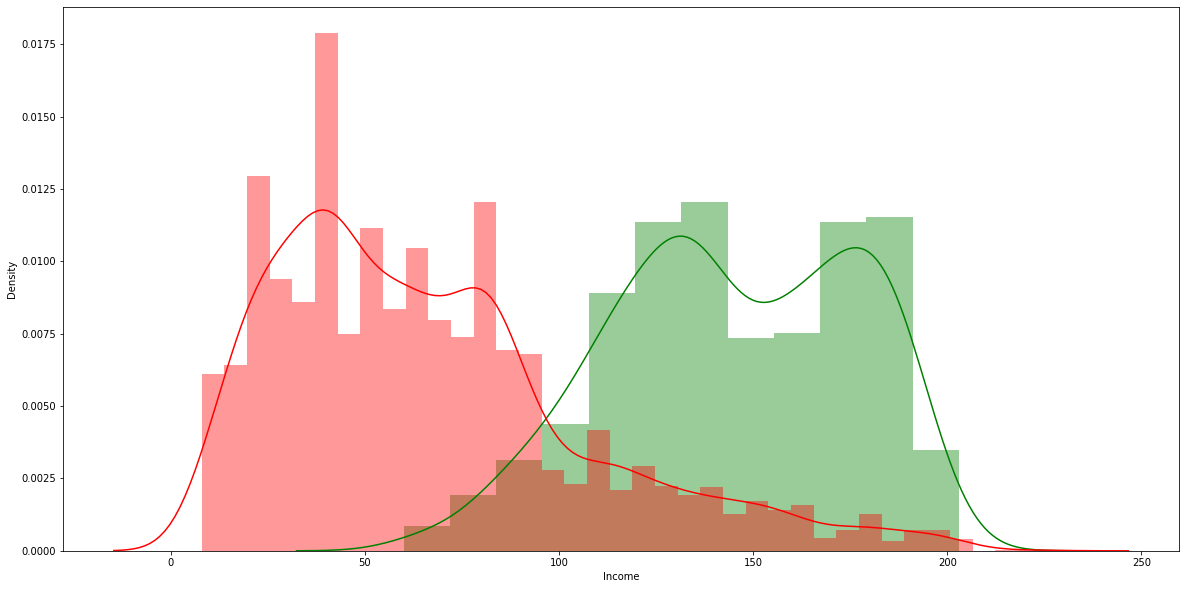

In [36]:
plt.figure(figsize = (20,10))
sns.distplot(personalloans['Income'], color = 'g')
sns.distplot(no_personalloans['Income'], color = 'r')

<Figure size 2160x2160 with 0 Axes>

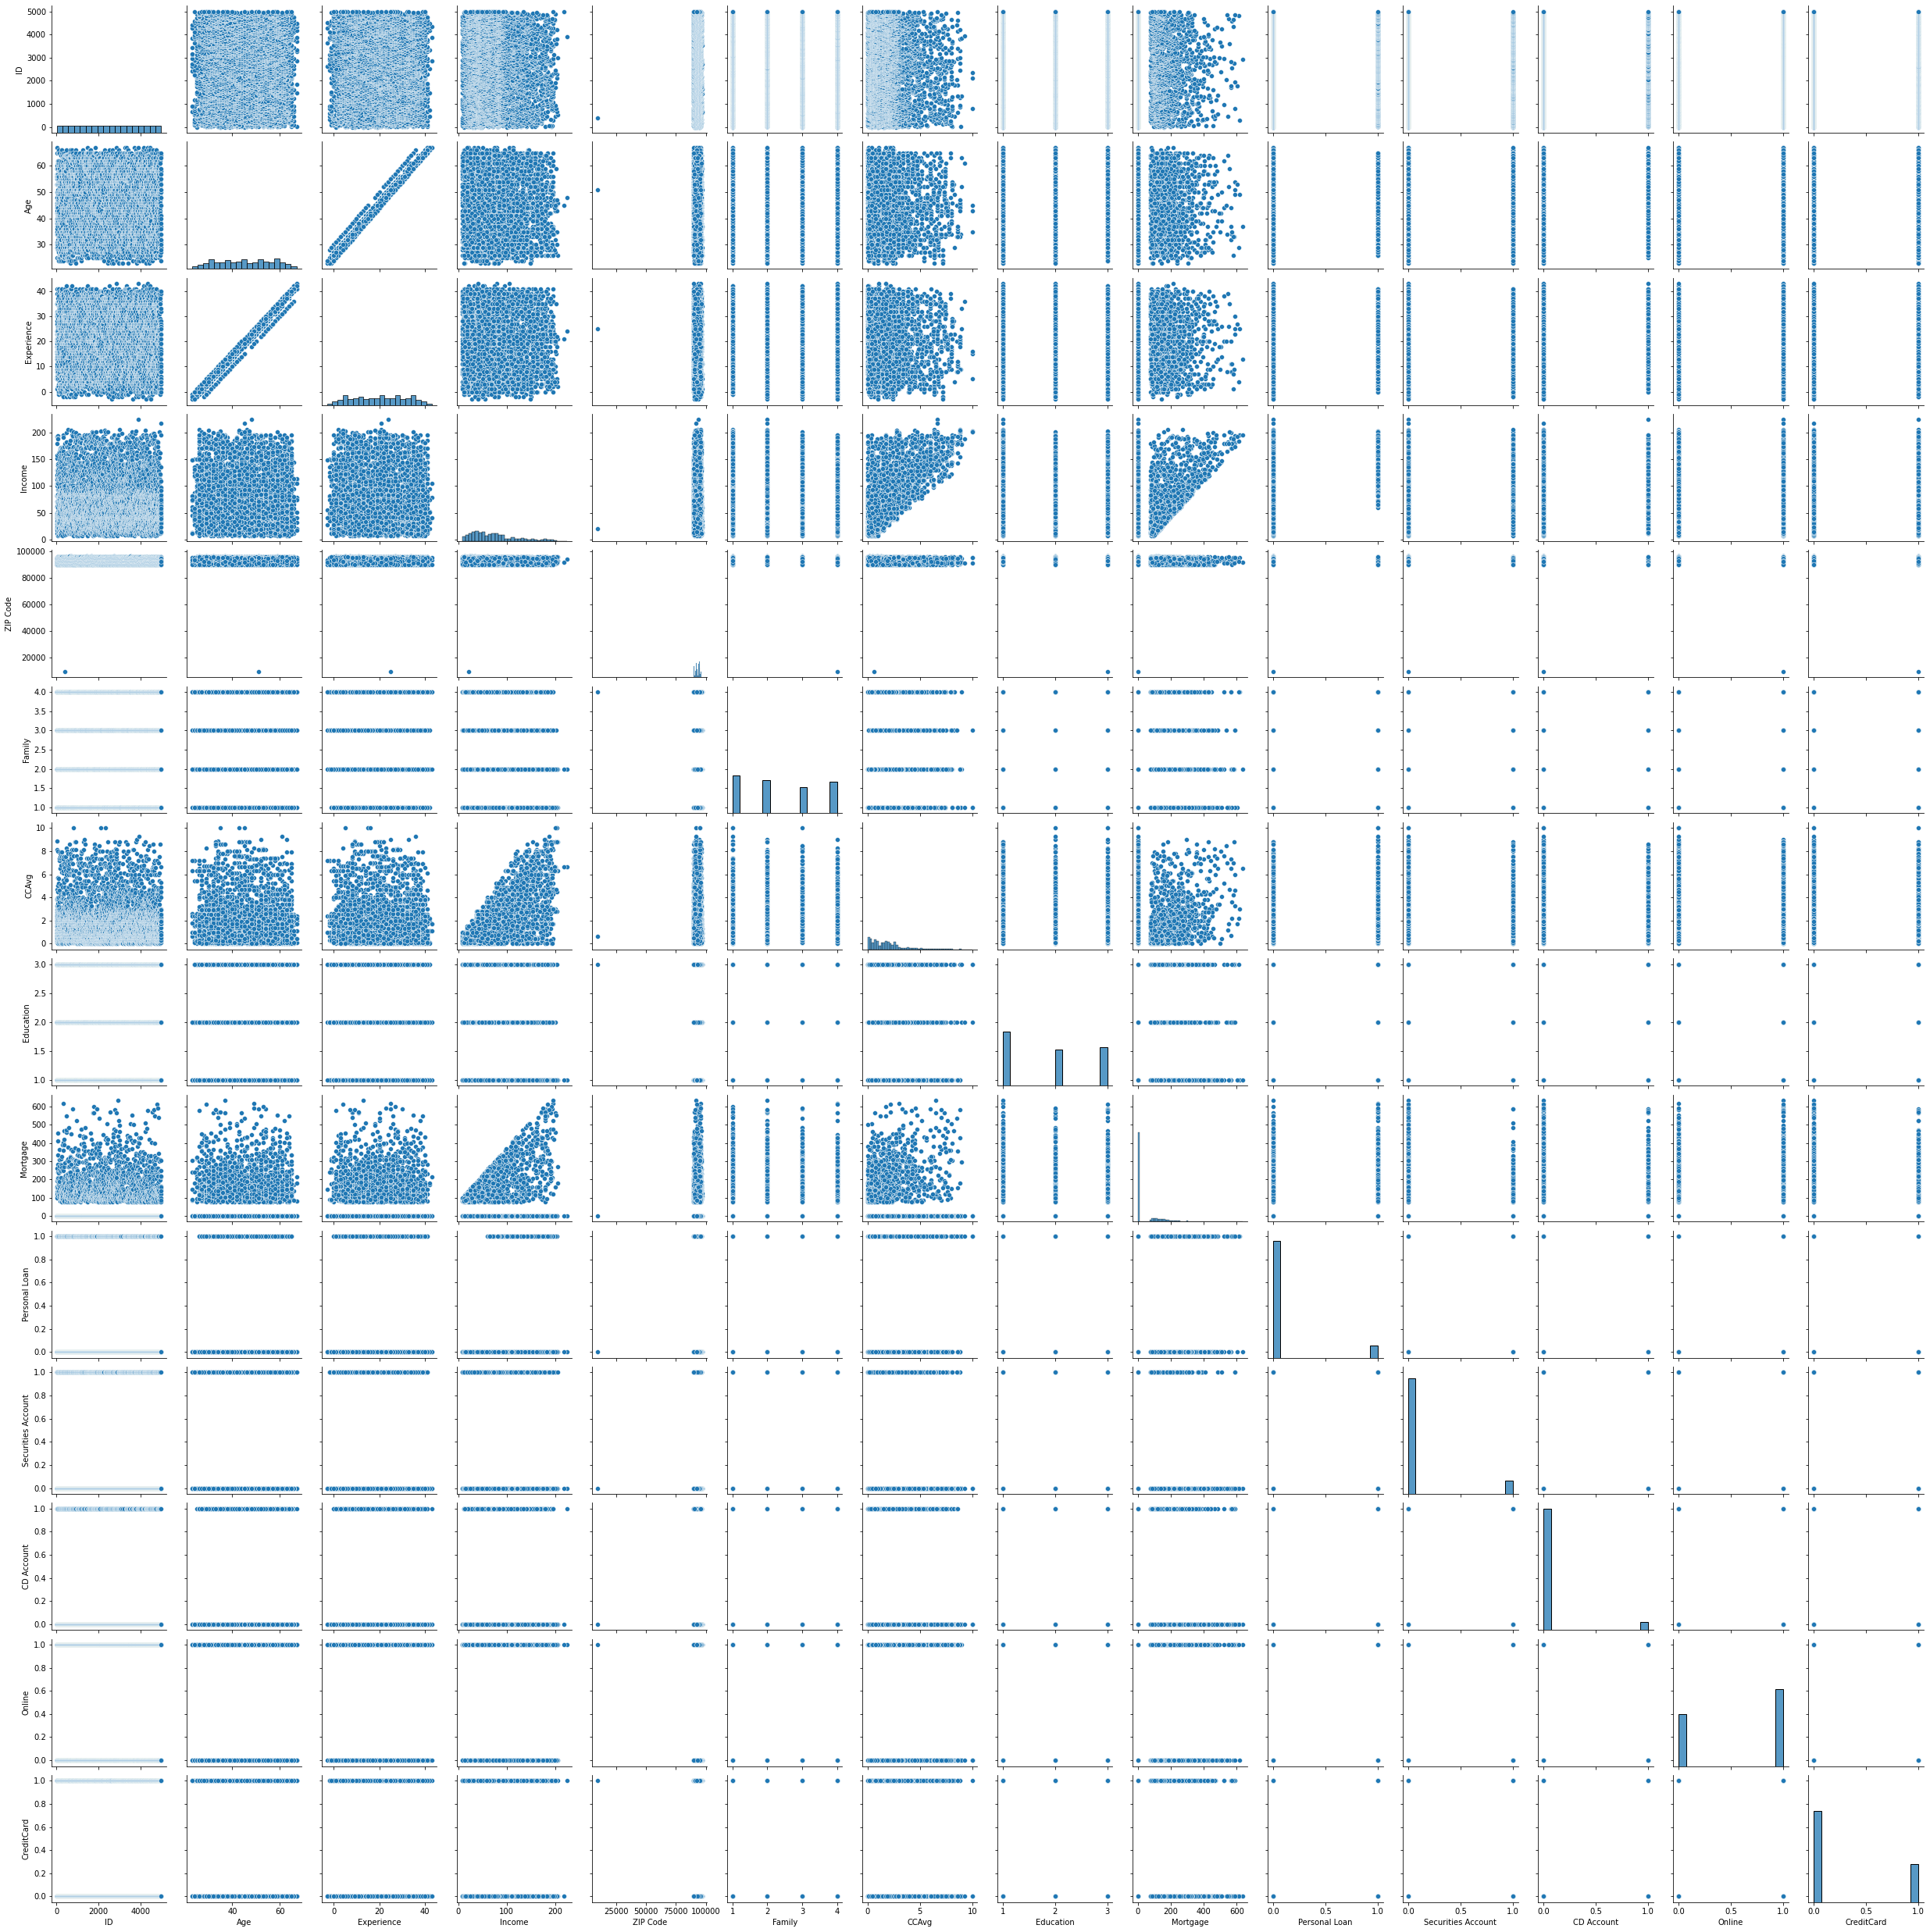

In [37]:
plt.figure(figsize = (30,30))
sns.pairplot(bank_df)

<AxesSubplot:>

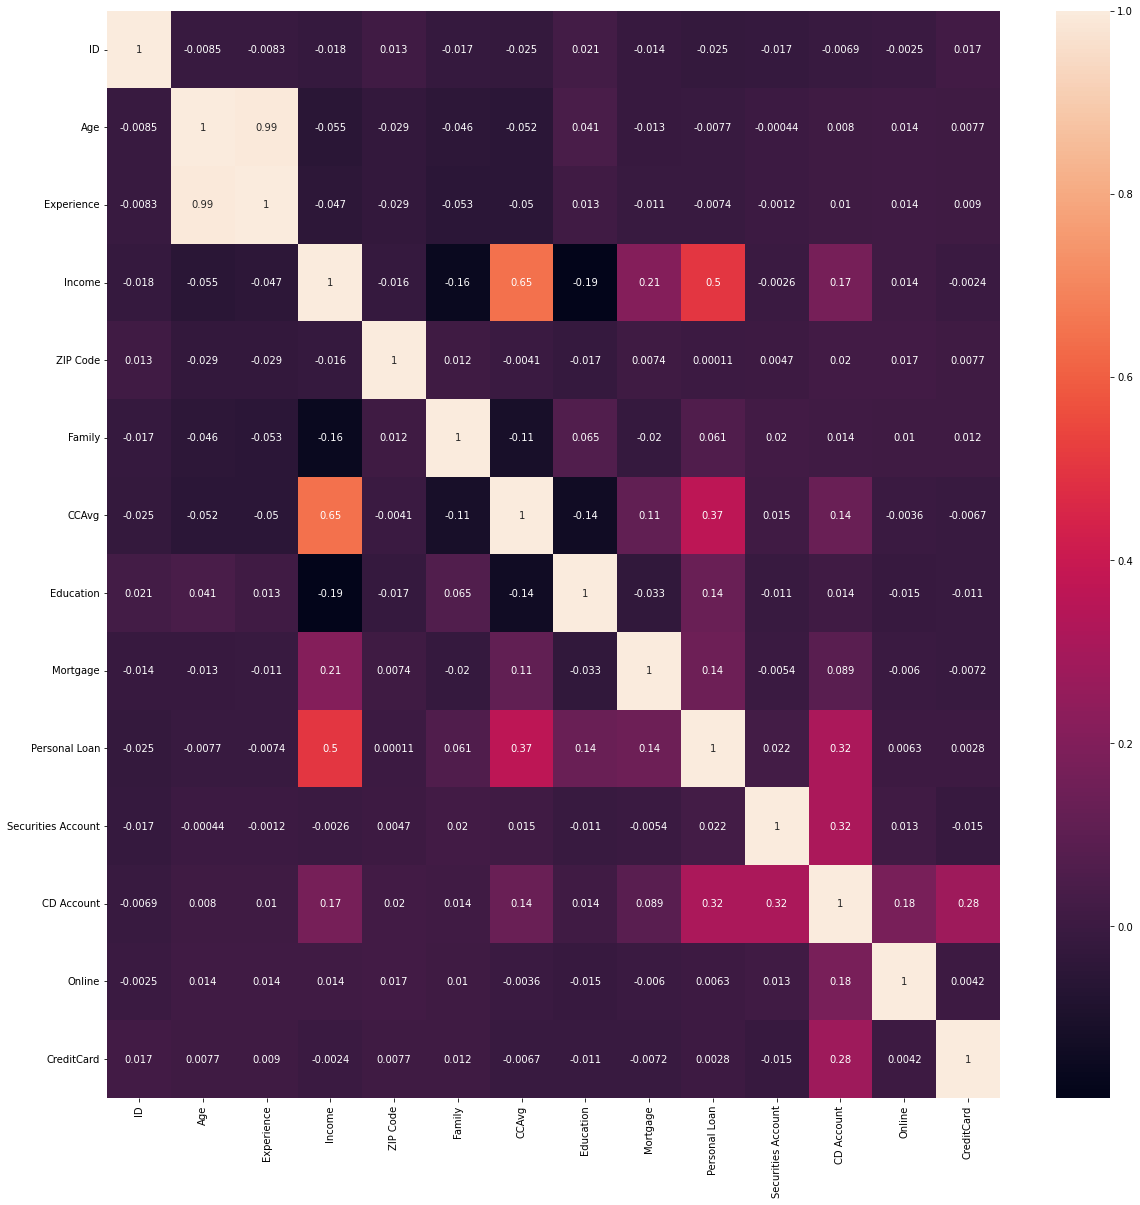

In [38]:
plt.figure(figsize = (20,20))
cm = bank_df.corr()
sns.heatmap(cm, annot = True)

<Figure size 1440x720 with 0 Axes>

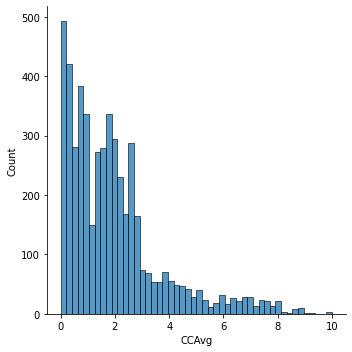

In [44]:
plt.figure(figsize = (20,10))
sns.displot(bank_df['CCAvg'])

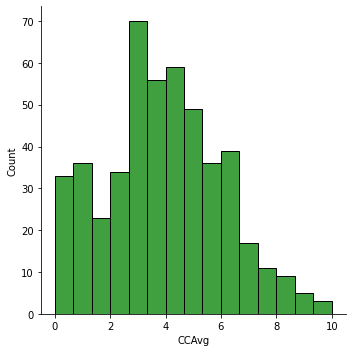

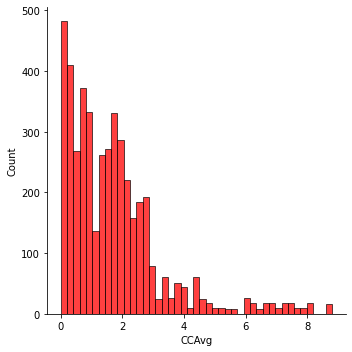

In [46]:
sns.displot(personalloans['CCAvg'],color = 'g')
sns.displot(no_personalloans['CCAvg'],color = 'r')

                         PREPARING DATA BEFORE TRANING THE MODEL

In [65]:
X = bank_df.drop(columns = ['Personal Loan'])
y = bank_df['Personal Loan']


0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [80]:
# CONVERTING OUTPUT TO 01 10 FORMAT [ARRAYS] TO FEED THE MODEL, WHICH HAE ADVANTAGE

from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [52]:
!pip install sklearn


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=510744e3e302b34b18ff1269fc904ae281efee18059b31502d277375e8365123
  Stored in directory: c:\users\akshv\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [81]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
x = scaler_x.fit_transform(X)
x

array([[-1.73170443, -1.77441684, -1.66607847, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-1.73101161, -0.02952359, -0.09633022, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-1.73031879, -0.55299157, -0.44516316, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.73031879,  1.54088033,  1.64783451, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.73101161,  1.71536965,  1.73504275, ..., -0.25354028,
         0.82195086, -0.64531434],
       [ 1.73170443, -1.51268285, -1.40445376, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [83]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 13) (1500, 13) (3500, 2) (1500, 2)


In [79]:
y_train

2285    1
2821    0
3385    0
1973    0
4475    0
       ..
4649    0
824     0
3838    0
1168    0
2916    0
Name: Personal Loan, Length: 3500, dtype: int64

In [108]:
# INITIALIZE THE MODEL

ANN_model = keras.Sequential()

# ADDING THE DENSE LAYER

ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation = 'relu'))

ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250, activation = 'linear'))

ANN_model.add(Dropout(0.4))

# ADDING DENSE LAYER WITH SOFTMAX ACTIVATION

ANN_model.add(Dense(2, activation = 'softmax'))
print(ANN_model.summary())


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 250)               3500      
                                                                 
 dropout_48 (Dropout)        (None, 250)               0         
                                                                 
 dense_64 (Dense)            (None, 500)               125500    
                                                                 
 dropout_49 (Dropout)        (None, 500)               0         
                                                                 
 dense_65 (Dense)            (None, 500)               250500    
                                                                 
 dropout_50 (Dropout)        (None, 500)               0         
                                                                 
 dense_66 (Dense)            (None, 500)             

In [109]:
# COMPLING THE MODEL

ANN_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [110]:
# FITTING THE MODEL

history = ANN_model.fit(x_train, y_train, epochs = 20, validation_split = 0.2, verbose = 1)


Epoch 1/20
88/88 [==============================] - 2s 15ms/step - loss: 0.2077 - accuracy: 0.9293 - val_loss: 0.1703 - val_accuracy: 0.9300
Epoch 2/20
88/88 [==============================] - 1s 13ms/step - loss: 0.1047 - accuracy: 0.9600 - val_loss: 0.1027 - val_accuracy: 0.9557
Epoch 3/20
88/88 [==============================] - 1s 14ms/step - loss: 0.0769 - accuracy: 0.9725 - val_loss: 0.0905 - val_accuracy: 0.9629
Epoch 4/20
88/88 [==============================] - 1s 13ms/step - loss: 0.0784 - accuracy: 0.9721 - val_loss: 0.0972 - val_accuracy: 0.9714
Epoch 5/20
88/88 [==============================] - 1s 13ms/step - loss: 0.0630 - accuracy: 0.9786 - val_loss: 0.0846 - val_accuracy: 0.9657
Epoch 6/20
88/88 [==============================] - 1s 13ms/step - loss: 0.0658 - accuracy: 0.9786 - val_loss: 0.0843 - val_accuracy: 0.9714
Epoch 7/20
88/88 [==============================] - 1s 13ms/step - loss: 0.0520 - accuracy: 0.9811 - val_loss: 0.0833 - val_accuracy: 0.9743
Epoch 8/20
88

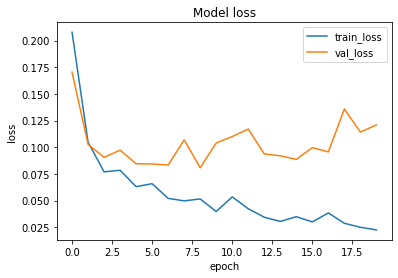

In [111]:
# PLOTING MODEL PERFORMANCE

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')

In [116]:
predictions = ANN_model.predict(x_test)

predict=[]
for i in predictions:
    predict.append(np.argmax(i))

47/47 [==============================] - 0s 4ms/step


In [118]:
# GETTING ACCURACY OF THE MODEL

result = ANN_model.evaluate(x_test, y_test)

print("Accuracy : {}".format(result[1]))

47/47 [==============================] - 0s 4ms/step - loss: 0.1140 - accuracy: 0.9747
Accuracy : 0.9746666550636292


In [119]:
# first index = loss, second index = accuracy
result

[0.11403439193964005, 0.9746666550636292]

In [121]:
y_original = []
for i in y_test:
    y_original.append(np.argmax(i))

<AxesSubplot:>

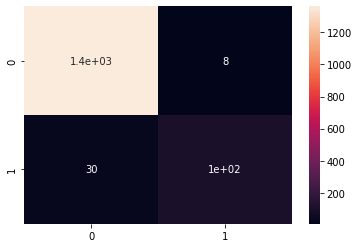

In [125]:
# CONFUSION MATRIX

confusion_matrix = metrics.confusion_matrix(y_original, predict)
sns.heatmap(confusion_matrix, annot = True)



In [126]:
# CLASSIFICATION REPORT

from sklearn.metrics import classification_report
print(classification_report(y_original, predict))



              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1369
           1       0.93      0.77      0.84       131

    accuracy                           0.97      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.97      0.97      0.97      1500

